Para obtener un mejor resultado en la integracion es mejor utilizar la aproximación de segundo orden y con varias variables. Como vimos en clase:

$$
\vec y_{n+1} = \vec y_n + h\vec f + \frac{1}{2}h^2 \left( \frac{\partial \vec f}{\partial x} +\mathbb{J}\vec f \right)
$$
donde $\vec f$ es $\vec f(x_n,\vec y_n)$, $\mathbb{J}$ es el jacobiano de $f$ evaluado en $(x_n,\vec y_n)$, y el orden del error es de $O(h^2)$.

In [2]:
from pylab import *
%matplotlib inline

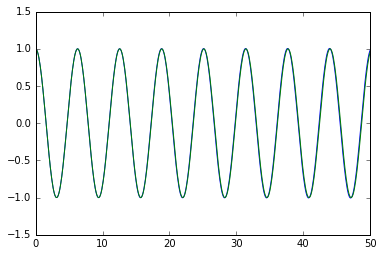

In [39]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f = ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])

def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

t,y=integra2(prueba,d_prueba,[1,0],[0,50],0.1)
#plot(y[:,0],y[:,1])
plot(t,y[:,0],t,cos(t))
show()

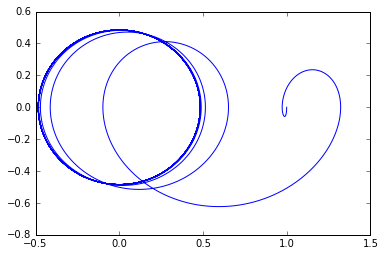

In [51]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+sin(t)])

def dp(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])

t,y=integra2(p,dp,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

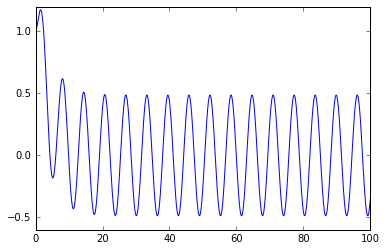

In [49]:
plot(t,y[:,0])

In [52]:
def rk2(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

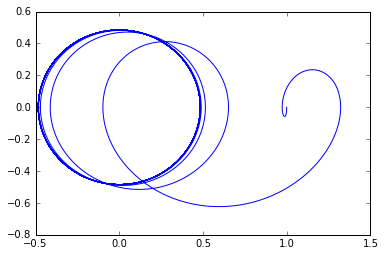

In [54]:
t,y=rk2(p,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])